## CDC Death data
Goals with death data:
- Support the method: Use this death data as evidence that my approach reflects real variation in the US population.
- Discoveries: extrapolate to drug patterns that are surprisingly associated with death rate

I used [CDC wonder](https://wonder.cdc.gov) to download sets of death causes by county for some [top causes of death](https://www.cdc.gov/nchs/data/nvsr/nvsr65/nvsr65_05.pdf), as well as the death rate.  These are all age-adjusted, per 100k people. Then since counties with higher death rate will have higher levels of all death causes, I created the ratio: $D_{county, cause} =  {rate_{county,cause} \over {rate_{county}}} $.

Below I generated a couple maps of these death causes (AK & HI have been scaled & moved to the box on the left)

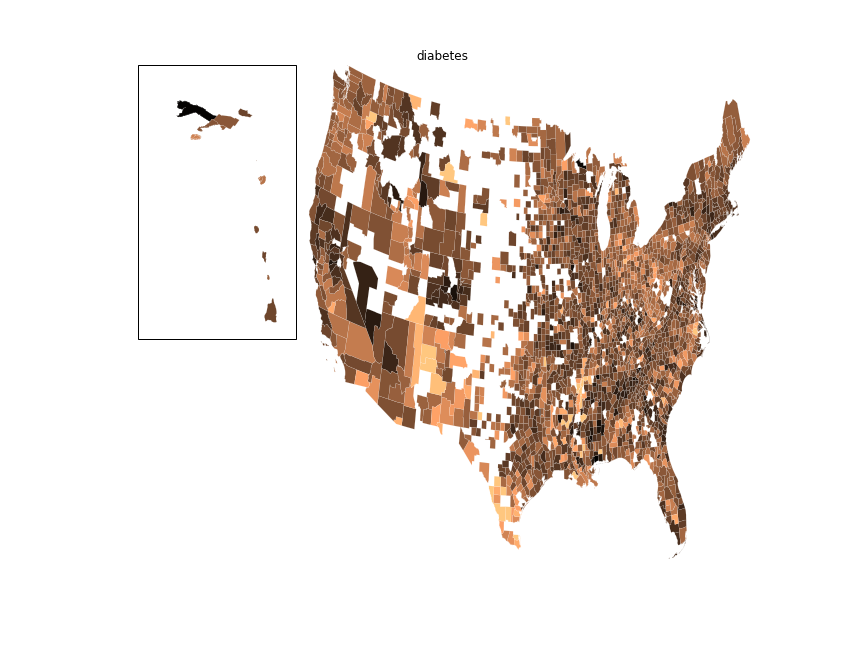

In [6]:
from IPython.display import Image 
Image(filename='png/diabetes.png',width=700)

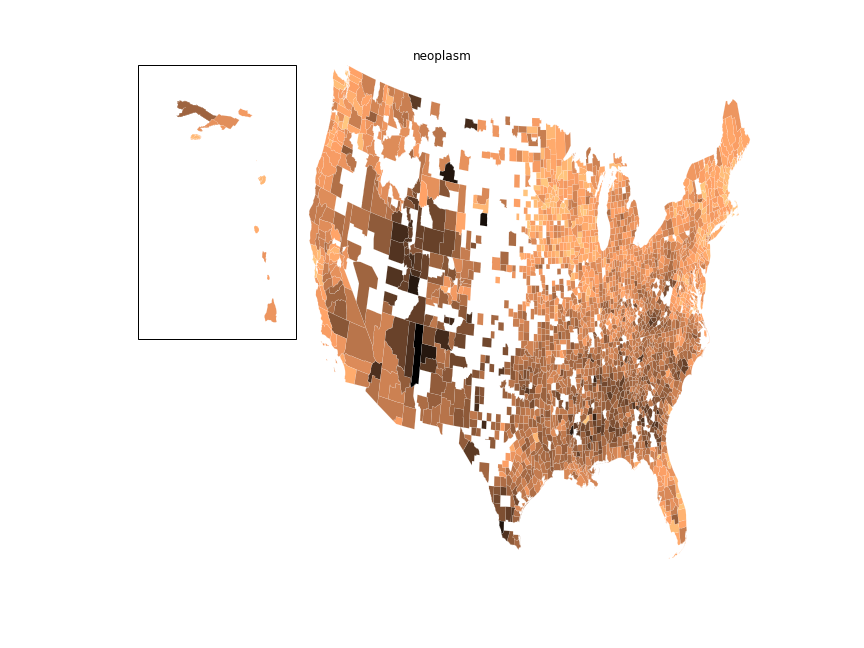

In [5]:
Image(filename='png/neoplasm.png',width=700)

Below are the correlations between the top causes, across the counties. Note that "ischaemic heart" disease, one of the top causes of death, is a subset of heart disease (in terms of ICD10 codes).  "Hypertensive heart" also overlaps with heart disease.

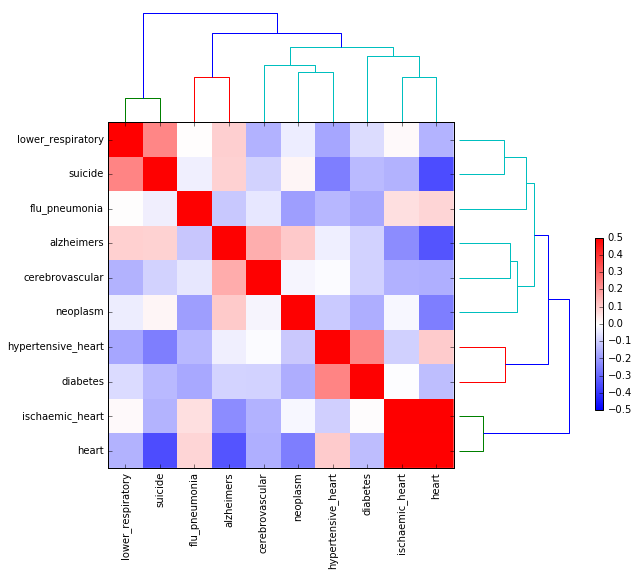

In [4]:
Image(filename='png/death_correlations.png',width=600)

Now I brought in my drug measurements across counties.  I calculated correlation between each drug's deviation score and each cause of death across counties.  Below, I show all the diabetes drugs versus causes of death.  Note that almost all the diabetes drugs are positively correlated with diabetes cause of death.  This seems very encouraging since this is an external source of data.  The diabetes drugs are also correlated with heart diseases, but the heart diseases are generally correlated with diabetes so you can't disentangle these.

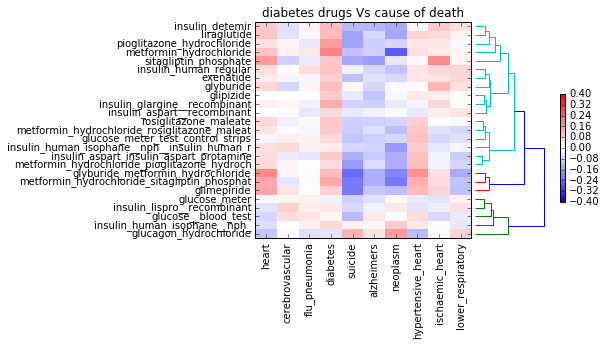

In [8]:
Image(filename='png/diabetes_drugs.png',width=600)

Then I ran elastic net regression to predict causes of death.  I used cause of death as the outcome variable, and the  600 drugs that have more than 50000 people taking them nationwide as predictors.  The diabetes drugs are clearly more predictive of cause of death than other drugs. Since they are highly correlated with each other you wouldnt expect the EN to choose them all. 

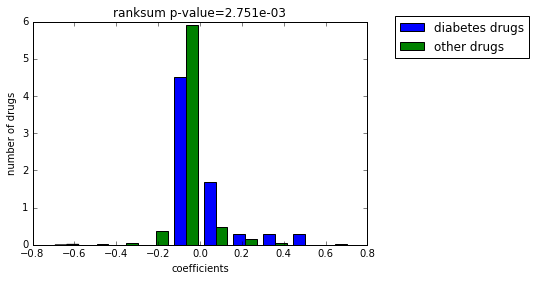

In [10]:
Image(filename='png/diabetes_elasticnet.png',width=500)

I also looked at the DEA level 2 drugs and their association with the causes of death.   You can see that the DEA category 2 opiates, but not the stimulants, are correlated with higher suicide.  Alzheimers is actually associated with stimulants more than opiates.  However, diseases, and drugs, have many correlations.

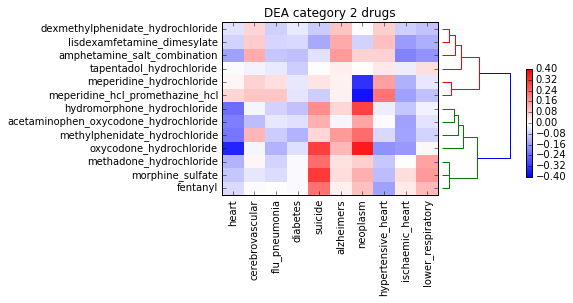

In [12]:
Image(filename='png/DEA2_deaths.png',width=600)

Here is another analysis showing that these drugs have high coefficients in the elastic net regression:

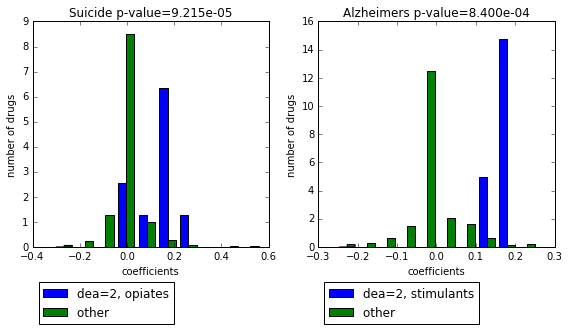

In [13]:
Image(filename='png/dea2_elasticnet.png',width=600)

## Thyroid hormone variation
Thyroid hormones are taken by almost 5 million people in the database, and they have interesting variation across the country, with more Rx in the west and less in the southeast:

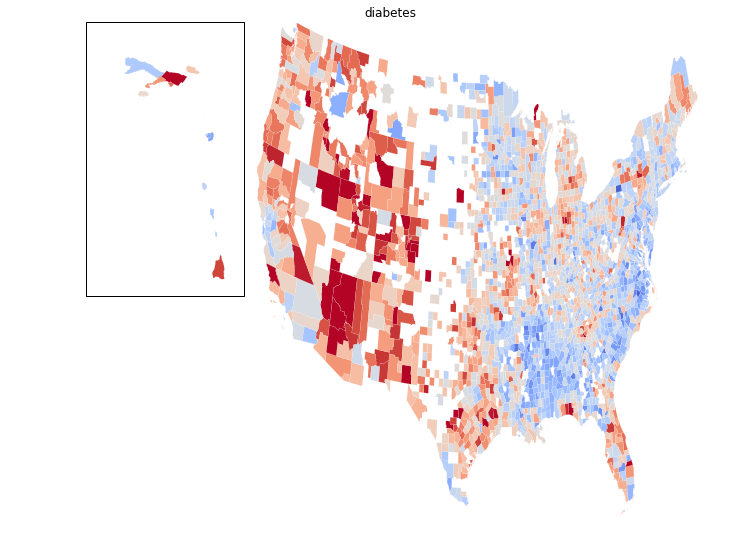

In [17]:
Image(filename='png/thryoid_drugs.png',width=700)

In addition the 3 types of thyroid replacement drugs are very correlated/predictive of each other (see elastic net analysis below). This is not interesting as a finding, but since each drug was fitted and assessed separately, it supports that I am uncovering real variation in thyroid drug use.  

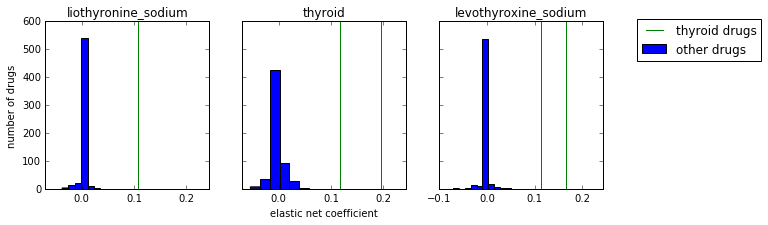

In [23]:
Image(filename='png/thyroid_elasticnet.png',width=600)

Next I tried to uncover what demographic factors are associated with variation in thyroid use.  Below, the correlations of thyroid hormones with demographic factors show counties with wealthy, educated, white non-hispanic people are more likely to get the drug, and inactive, obese, unemployed have less drug.

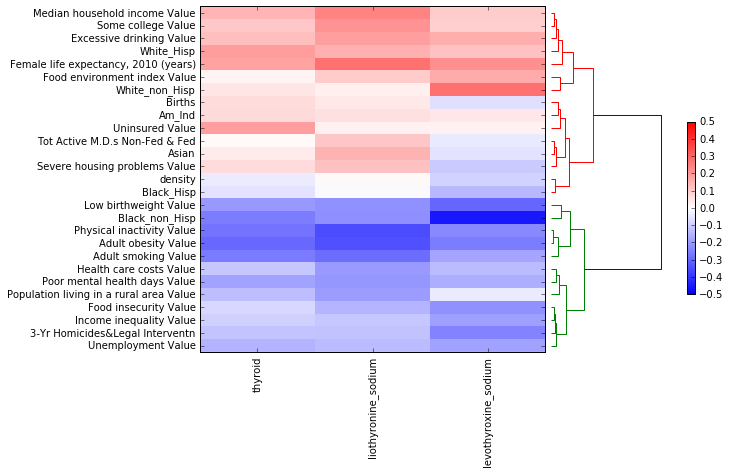

In [21]:
Image(filename='png/thyroid_demographics.png',width=600)

To try to untangle the effects I regressed the drug variables on the demographic variables, either with elastic net or with grouped-penalty elastic net.  The results were pretty similar. Interestingly, of the variables positively associated with thyroid hormones, only Uninsured Value is chosen. Education and income are not as associated as Black_non_Hisp or Physical_inactivity_Value

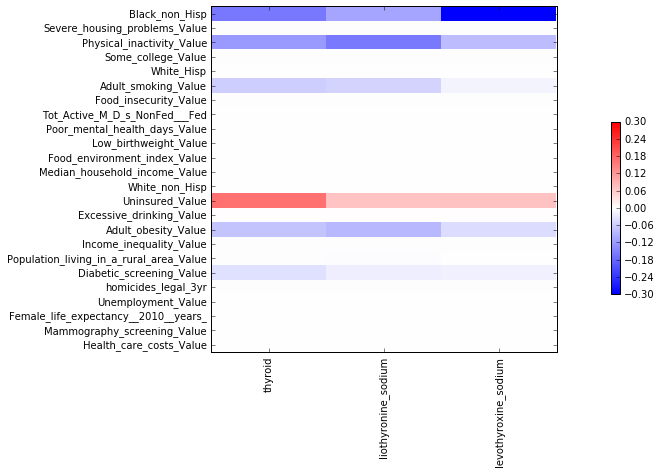

In [26]:
Image(filename='png/thyroid_mten.png',width=600)

To give a better idea of the effects of physical inactivity, Black non-hispanic, and uninsured on thyroid prescription, I plotted all 3 variables below.  There is an weak interaction effect between Physical_inactivity and Uninsured_Value.

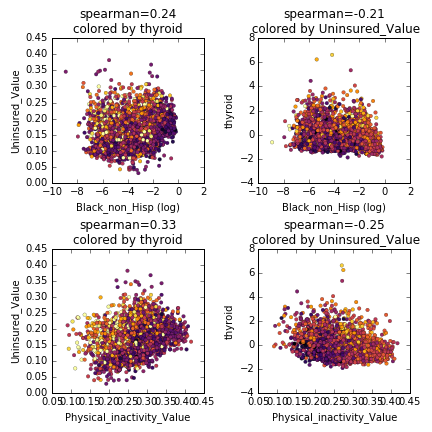

In [28]:
Image(filename='png/thyroid_black_inactivity_uninsured.png',width=600)

## Conclusions

- CDC death rates can be a good source of evidence that I am capturing expected variation
- But extrapolating to new findings might be tricky given the high correlations of diseases/drugs across the counties. The dimensionality reduction approaches (previous work) seem like a better choice.
- I can show consistency of different thyroid hormone drugs. Regularized regression shows that even controlling for income, education and life expectancy, the most predictive variables are inactivity, black non-hispanic, and uninsured status.